# Seattle and Boston Airbnb Data

"Airbnb (ABNB) is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.

The company has come a long way since 2007, when its co-founders first came up with the idea to invite paying guests to sleep on an air mattress in their living room. According to Airbnb's latest data, it has in excess of six million listings, covering more than 100,000 cities and towns and 220-plus countries worldwide." 

Information gathered from:
https://www.investopedia.com/articles/personal-finance/032814/pros-and-cons-using-airbnb.asp

The datasets that are going to be analyzed in this project are the Seattle and Boston Airbnb Data. These datasets have information about the reviews, the scores and calendar information that include prices.

<br> There are somme suggested questions for both datasets that are:</br>

<br>1) What are the busiest times of the year to visit each city?</br>
<br>2) Which city has the best Airbnb ratings?</br>
<br>3) What characteristics are related to higher ratings?</br>
<br>4) Which are the best rated hosts?</br>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

## A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [2]:
#Contiene información de los 
Seattle_calendar = pd.read_csv('./Seattle/calendar.csv')
Seattle_listings= pd.read_csv('./Seattle/listings.csv')
Seattle_reviews= pd.read_csv('./Seattle/reviews.csv')

Boston_calendar = pd.read_csv('./Boston/calendar.csv')
Boston_listings= pd.read_csv('./Boston/listings.csv')
Boston_reviews= pd.read_csv('./Boston/reviews.csv')

from datetime import datetime

**1.** Number of rows and columns.

In [3]:
print ("Seattle Calendar:" + str(Seattle_calendar.shape))
print ("Seattle listings:" + str(Seattle_listings.shape))
print ("Seattle reviews:" + str(Seattle_reviews.shape))
print ("Boston Calendar:" + str(Boston_calendar.shape))
print ("Boston listings:" + str(Boston_listings.shape))
print ("Boston reviews:" + str(Boston_reviews.shape))

Seattle Calendar:(1393570, 4)
Seattle listings:(3818, 92)
Seattle reviews:(84849, 6)
Boston Calendar:(1308890, 4)
Boston listings:(3585, 95)
Boston reviews:(68275, 6)


**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [4]:
print ("Seattle Calendar:" + str(Seattle_calendar.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
Seattle Calendar:None


In [5]:
Seattle_calendar.price.isna().sum()/len(Seattle_calendar)

0.32938998399793334

In [6]:
Seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


33.94% of the Seattle price values are null. It is important to see the relevance of this proportion in order to see how they are going to be treated.

In [7]:
Seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
print ("Seattle listings:" + str(Seattle_listings.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [9]:
most_missing_cols = []
for i in Seattle_listings.columns:
    if Seattle_listings[i].isnull().sum()/len(Seattle_listings[i])>0.75:
        most_missing_cols.append(i)

In [10]:
most_missing_cols

['square_feet', 'license']

The columns that have more than 75% of missing values are square_feet and license. Therefore, those columns are going to be deleted. 

On the other hand, the columns with URLs, scrape ID,Last_scrapped  does not give important information to the analysis I will develop. Therefore this will be dalated.

Price, weekly price, monthly price, security deposit, cleaning fee,  has the wrong datatype.

In [11]:
Seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [12]:
print ("Seattle reviews:" + str(Seattle_reviews.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
Seattle reviews:None


In [13]:
Seattle_reviews.comments.isna().sum()/len(Seattle_reviews)*100

0.021214156914047308

The date type needs to be changed because it appears as an object

In [14]:
Boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [15]:
print ("Boston Calendar:" + str(Boston_calendar.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
Boston Calendar:None


In [16]:
Boston_calendar.price.isna().sum()/len(Boston_calendar)*100

50.87157820748879

50% of the prices are null. on the other hand, the date has an incorrect type.

In [17]:
Boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [18]:
print ("Boston listings:" + str(Boston_listings.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [19]:
most_missing_colsB = []
for i in Boston_listings.columns:
    if Boston_listings[i].isnull().sum()/len(Boston_listings[i])>0.75:
        most_missing_colsB.append(i)

In [20]:
most_missing_colsB

['neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'has_availability',
 'license',
 'jurisdiction_names']

The columns with most null values are: 'neighbourhood_group_cleansed','square_feet','weekly_price','monthly_price', 'has_availability', 'license',
 'jurisdiction_names'. It is important to see if they will be delated or treated. For example if null values are set as 0 and the final number of columns should be the same as the Seattle_listing data.
 
 On the other hand, the columns with URLs, scrape ID,Last_scrapped  does not give important information to the analysis I will develop. Therefore this will be dalated.

Price, weekly price, monthly price, security deposit, cleaning fee,  has the wrong datatype.

In [21]:
Boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [22]:
print ("Boston reviews:" + str(Boston_reviews.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB
Boston reviews:None


**3.** Describe de information of each dataset.

In [23]:
Seattle_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [24]:
Seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [25]:
Seattle_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [26]:
Boston_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [27]:
Boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [28]:
Boston_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

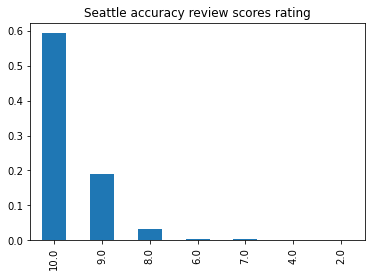

In [29]:
ed_vals = Seattle_listings.review_scores_accuracy.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Seattle_listings.shape[0]).plot(kind="bar");
plt.title("Seattle accuracy review scores rating");

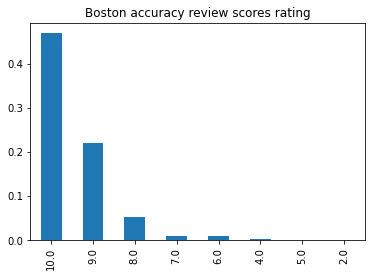

In [30]:
ed_vals = Boston_listings.review_scores_accuracy.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Boston_listings.shape[0]).plot(kind="bar");
plt.title("Boston accuracy review scores rating");

The accuracy reviews between both cities are similar. However, we can find that Seattles scores are slightly better.

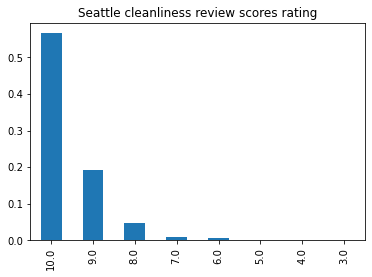

In [31]:
ed_vals = Seattle_listings.review_scores_cleanliness.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Seattle_listings.shape[0]).plot(kind="bar");
plt.title("Seattle cleanliness review scores rating");

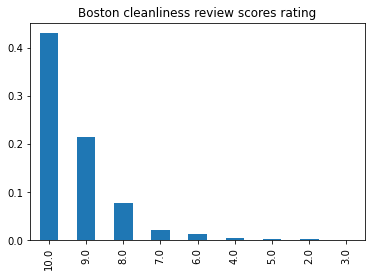

In [32]:
ed_vals = Boston_listings.review_scores_cleanliness.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Boston_listings.shape[0]).plot(kind="bar");
plt.title("Boston cleanliness review scores rating");


Seattle is has a little bit better scores in cleanliness.

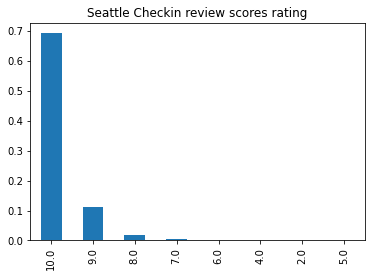

In [33]:
ed_vals = Seattle_listings.review_scores_checkin.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Seattle_listings.shape[0]).plot(kind="bar");
plt.title("Seattle Checkin review scores rating");

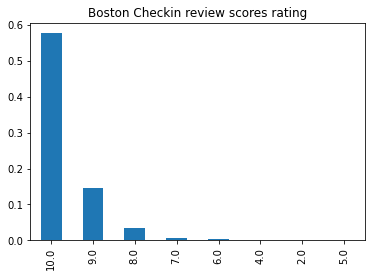

In [34]:
ed_vals = Boston_listings.review_scores_checkin.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Boston_listings.shape[0]).plot(kind="bar");
plt.title("Boston Checkin review scores rating");

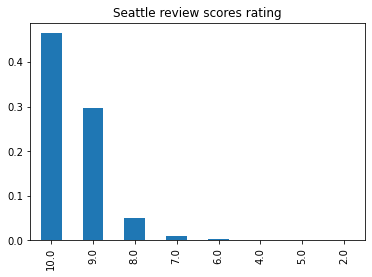

In [35]:
ed_vals = Seattle_listings.review_scores_value.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Seattle_listings.shape[0]).plot(kind="bar");
plt.title("Seattle review scores rating");

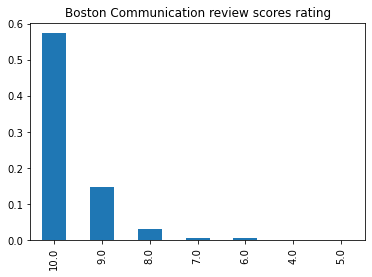

In [36]:
ed_vals = Boston_listings.review_scores_communication.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Boston_listings.shape[0]).plot(kind="bar");
plt.title("Boston Communication review scores rating");

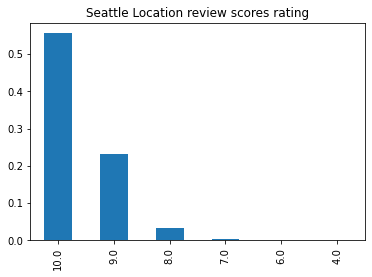

In [37]:
ed_vals = Seattle_listings.review_scores_location.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Seattle_listings.shape[0]).plot(kind="bar");
plt.title("Seattle Location review scores rating");

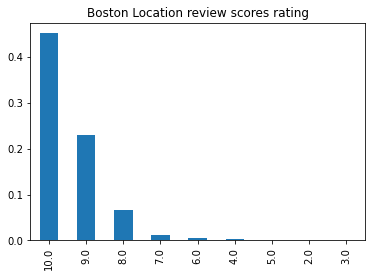

In [38]:
ed_vals = Boston_listings.review_scores_location.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Boston_listings.shape[0]).plot(kind="bar");
plt.title("Boston Location review scores rating");

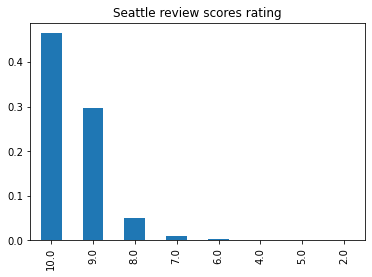

In [39]:
ed_vals = Seattle_listings.review_scores_value.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Seattle_listings.shape[0]).plot(kind="bar");
plt.title("Seattle review scores rating");

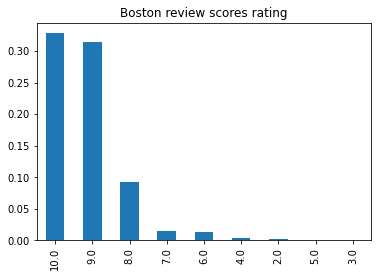

In [40]:
ed_vals = Boston_listings.review_scores_value.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Boston_listings.shape[0]).plot(kind="bar");
plt.title("Boston review scores rating");

In general, Seattle has slightly better reviews scores in all elements.

In [41]:
Seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


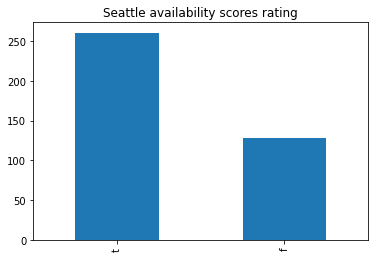

In [42]:
ed_vals = Seattle_calendar.available.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Boston_listings.shape[0]).plot(kind="bar");
plt.title("Seattle availability scores rating");

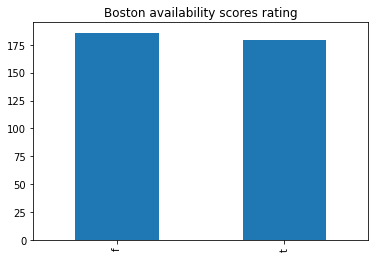

In [43]:
ed_vals = Boston_calendar.available.value_counts()#Provide a pandas series of the counts for each review score

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/Boston_listings.shape[0]).plot(kind="bar");
plt.title("Boston availability scores rating");

## General Findigs
<br><b>Seattle calendar</b></br>
<br> * 33.94% of the Seattle price values are null.</br>
<br> * The date in Seattle price is type object and not date. The data type need to be changed. Something similar occurs with price which type is object. This data type needs to be changed.</br>
<br><b>Seattle listings</b></br>
<br> * The columns that have more than 75% of missing values in seattle listings are square_feet and license. Therefore, those columns are going to be deleted.</br>
<br> * On the other hand, the listink URL does not give important information to the analysis I will develop. Therefore this will be delated.</br>
<br> * Price, weekly price, monthly price, security deposit, cleaning fee,  has the wrong datatype.</br>
<br><b>Seattle reviews</b></br>
<br> * The date type needs to be changed because it appears as an object.</br>
<br><b>Boston calendar</b></br>
<br> * 50% of the prices are null. on the other hand, the date has an incorrect type.</br>
<br><b>Boston listings</b></br>
<br> * The columns with most null values are: 'neighbourhood_group_cleansed','square_feet','weekly_price','monthly_price', 'has_availability', 'license',
 'jurisdiction_names'. It is important to see if they will be delated or treated. For example if null values are set as 0 and the final number of columns should be the same as the Seattle_listing data.</br>
<br> * On the other hand, the listink URL does not give important information to the analysis I will develop. Therefore this will be delated.</br>
<br> * Price, weekly price, monthly price, security deposit, cleaning fee,  has the wrong datatype.</br>
<br><b>Boston reviews</b></br>
<br> * The date type needs to be changed because it appears as an object.</br>
<br><b>General</b></br>
<br> * There should be one dataset for each dimension and one for the facts regardless the city</br>
<br> * Dimensional and fact tables should be linked by a key</br>
<br> * In all the dimensions, Seattle has has slightly better ratings than Boston </br>

## Data preparation

* 33,94% of seattle price values are null and 50% of Boston prices are null
This is due to the fact that when the place is not available, the price appears as null

In [44]:
available_Seattle=Seattle_calendar[Seattle_calendar['available']=="t"]

In [45]:
available_Seattle.price.isnull().value_counts()

False    934542
Name: price, dtype: int64

In [46]:
available_Boston=Boston_calendar[Boston_calendar['available']=="t"]

In [47]:
available_Boston.price.isnull().value_counts()

False    643037
Name: price, dtype: int64

* Boston and seattle dates have incorrect date format

In [48]:
Seattle_calendar2=Seattle_calendar.copy()

In [49]:
Seattle_calendar2['date']=pd.to_datetime(Seattle_calendar2['date'])

In [50]:
Boston_calendar2=Boston_calendar.copy()

In [51]:
Boston_calendar2['date']=pd.to_datetime(Boston_calendar2['date'])

* Seattle and Boston prie appear as object

In [52]:
Seattle_calendar2['price'] = Seattle_calendar2['price'].apply(lambda x: str.replace(str(x),"$",""))
Seattle_calendar2['price'] = Seattle_calendar2['price'].apply(lambda x: str.replace(str(x),",",""))

In [53]:
Seattle_calendar2.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
2,241032,2016-01-06,f,nan
3,241032,2016-01-07,f,nan
4,241032,2016-01-08,f,nan


In [54]:
Seattle_calendar2['price']=Seattle_calendar2['price'].astype(float)

In [55]:
Boston_calendar2['price']=Boston_calendar2['price'].apply(lambda x: str.replace(str(x),"$",""))
Boston_calendar2['price']=Boston_calendar2['price'].apply(lambda x: str.replace(str(x),",",""))

In [56]:
Boston_calendar2['price']=Boston_calendar2['price'].astype(float)

In [57]:
# Lets proove the change was made
print(Seattle_calendar2.info())
print(Boston_calendar2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.9+ MB
None


* Select the columns to analyze

In [58]:
Seattle_listings2=Seattle_listings[['id', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'host_id','host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 
       'host_has_profile_pic', 'host_identity_verified',
       'market',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 
       'reviews_per_month']].copy()

market define if it is Seattle and city the subdivision. Country is allways United States, therefore it will be delated.

In [59]:
# The same columns will be selected to Boston in order to be able to compare both cities
Boston_listings2=Boston_listings[['id', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'host_id','host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 
       'host_has_profile_pic', 'host_identity_verified',
       'market',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 
       'reviews_per_month']].copy()

In [60]:
# Delete rows with all missing values
Seattle_listings2=Seattle_listings2.dropna(axis=0,how='all')
Boston_listings2=Boston_listings2.dropna(axis=0,how='all')

In [61]:
# Drop rows that have missing values in the reviwe scores that is the target variable
Seattle_listings2=Seattle_listings2.dropna(subset=['review_scores_value'],how='any')
Boston_listings2=Boston_listings2.dropna(subset=['review_scores_value'],how='any')

* Price, weekly price, monthly price, security deposit, cleaning fee, has the wrong datatype in Boston and Seattle listings

In [62]:
Seattle_listings2['price']=Seattle_listings2['price'].apply(lambda x: str.replace(str(x),"$",""))
Seattle_listings2['weekly_price']=Seattle_listings2['weekly_price'].apply(lambda x: str.replace(str(x),"$",""))
Seattle_listings2['monthly_price']=Seattle_listings2['monthly_price'].apply(lambda x: str.replace(str(x),"$",""))
Seattle_listings2['security_deposit']=Seattle_listings2['security_deposit'].apply(lambda x: str.replace(str(x),"$",""))
Seattle_listings2['cleaning_fee']=Seattle_listings2['cleaning_fee'].apply(lambda x: str.replace(str(x),"$",""))

Boston_listings2['price']=Boston_listings2['price'].apply(lambda x: str.replace(str(x),"$",""))
Boston_listings2['weekly_price']=Boston_listings2['weekly_price'].apply(lambda x: str.replace(str(x),"$",""))
Boston_listings2['monthly_price']=Boston_listings2['monthly_price'].apply(lambda x: str.replace(str(x),"$",""))
Boston_listings2['security_deposit']=Boston_listings2['security_deposit'].apply(lambda x: str.replace(str(x),"$",""))
Boston_listings2['cleaning_fee']=Boston_listings2['cleaning_fee'].apply(lambda x: str.replace(str(x),"$",""))

Seattle_listings2['price']=Seattle_listings2['price'].apply(lambda x: str.replace(str(x),",",""))
Seattle_listings2['weekly_price']=Seattle_listings2['weekly_price'].apply(lambda x: str.replace(str(x),",",""))
Seattle_listings2['monthly_price']=Seattle_listings2['monthly_price'].apply(lambda x: str.replace(str(x),",",""))
Seattle_listings2['security_deposit']=Seattle_listings2['security_deposit'].apply(lambda x: str.replace(str(x),",",""))
Seattle_listings2['cleaning_fee']=Seattle_listings2['cleaning_fee'].apply(lambda x: str.replace(str(x),",",""))

Boston_listings2['price']=Boston_listings2['price'].apply(lambda x: str.replace(str(x),",",""))
Boston_listings2['weekly_price']=Boston_listings2['weekly_price'].apply(lambda x: str.replace(str(x),",",""))
Boston_listings2['monthly_price']=Boston_listings2['monthly_price'].apply(lambda x: str.replace(str(x),",",""))
Boston_listings2['security_deposit']=Boston_listings2['security_deposit'].apply(lambda x: str.replace(str(x),",",""))
Boston_listings2['cleaning_fee']=Boston_listings2['cleaning_fee'].apply(lambda x: str.replace(str(x),",",""))

In [63]:
Seattle_listings2[['price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee']]=Seattle_listings2[['price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee']].astype(float)
Boston_listings2[['price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee']]=Boston_listings2[['price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee']].astype(float)

In [64]:
print(Seattle_listings2.info())
print(Boston_listings2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3162 entries, 0 to 3814
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3162 non-null   int64  
 1   summary                           2995 non-null   object 
 2   space                             2836 non-null   object 
 3   description                       3162 non-null   object 
 4   experiences_offered               3162 non-null   object 
 5   neighborhood_overview             2427 non-null   object 
 6   notes                             1982 non-null   object 
 7   transit                           2521 non-null   object 
 8   host_id                           3162 non-null   int64  
 9   host_about                        2588 non-null   object 
 10  host_response_time                2854 non-null   object 
 11  host_response_rate                2854 non-null   object 
 12  host_a

* Date in seattle_reviews and Boston_reviews has an incorrecto format.

In [65]:
Seattle_reviews2=Seattle_reviews.copy()
Boston_reviews2=Boston_reviews.copy()

In [66]:
Seattle_reviews2['date']=pd.to_datetime(Seattle_reviews2['date'])

In [67]:
Boston_reviews2['date']=pd.to_datetime(Boston_reviews2['date'])

In [68]:
Seattle_reviews2.info()
Boston_reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id             84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   id             68275 non-null  int64         
 2   date           68275 non-null  datetime64[ns]
 3   reviewer_id    68275 non-null  int64         
 

* For variables that are not categories I will include if the information is present or not.

In [110]:
Seattle_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','experiences_offered','space']]=Seattle_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','experiences_offered','space']].fillna(0)
Boston_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','experiences_offered','space']]=Boston_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','experiences_offered','space']].fillna(0)

In [111]:
Seattle_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','experiences_offered','space']]=np.where(Seattle_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','experiences_offered','space']]!=0,1,0)
Boston_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','experiences_offered','space']]=np.where(Boston_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','experiences_offered','space']]!=0,1,0)

In [112]:
Seattle_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities','space']].head()

,summary,description,neighborhood_overview,notes,transit,host_about,amenities,space
0,0,1,0,0,0,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1


In [113]:
Boston_listings2[['summary','description','neighborhood_overview','notes','transit','host_about','amenities']].head()

,summary,description,neighborhood_overview,notes,transit,host_about,amenities
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
5,1,1,1,0,1,0,1


In [114]:
# I will combine Seattle and Boston Data Frame
listings= Seattle_listings2.append(Boston_listings2, ignore_index=True)

* I will treat missing values in numerical data

In [115]:
missing_columns=listings.columns[listings.isna().any()]
print(missing_columns)

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'market', 'property_type', 'bathrooms',
       'bedrooms', 'beds', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'has_availability', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location'],
      dtype='object')


In [116]:
listings[['host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'market', 'property_type',
       'bathrooms', 'bedrooms', 'beds', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'has_availability',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5926 entries, 0 to 5925
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           5401 non-null   object 
 1   host_response_rate           5401 non-null   object 
 2   host_acceptance_rate         5236 non-null   object 
 3   host_neighbourhood           5480 non-null   object 
 4   market                       5920 non-null   object 
 5   property_type                5924 non-null   object 
 6   bathrooms                    5902 non-null   float64
 7   bedrooms                     5912 non-null   float64
 8   beds                         5920 non-null   float64
 9   weekly_price                 2605 non-null   float64
 10  monthly_price                2142 non-null   float64
 11  security_deposit             2724 non-null   float64
 12  cleaning_fee                 4379 non-null   float64
 13  has_availability  

In [117]:
numerical_columns_missing_values=['bathrooms', 'bedrooms', 'beds', 'weekly_price', 'monthly_price','security_deposit', 'cleaning_fee','review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location']

* I will convert the categorical columns into dummies. On the other hand, for the analysis made I will only use Seattle and boston Lightings because and the calendar of Seattle and Boston.

In [118]:
cat_cols=listings.select_dtypes(include=['object']).copy().columns

In [119]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [120]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5926 entries, 0 to 5925
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                5926 non-null   int64  
 1   summary                           5926 non-null   int64  
 2   space                             5926 non-null   int64  
 3   description                       5926 non-null   int64  
 4   experiences_offered               5926 non-null   int64  
 5   neighborhood_overview             5926 non-null   int64  
 6   notes                             5926 non-null   int64  
 7   transit                           5926 non-null   int64  
 8   host_id                           5926 non-null   int64  
 9   host_about                        5926 non-null   int64  
 10  host_response_time                5401 non-null   object 
 11  host_response_rate                5401 non-null   object 
 12  host_a

In [121]:
listings = create_dummy_df(listings,cat_cols, dummy_na=True)

In [122]:
listings.head()

,id,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_id,host_about,...,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,241032,0,1,1,1,0,0,0,956883,1,...,0,0,1,0,0,0,0,0,0,0
1,953595,1,1,1,1,1,1,1,5177328,1,...,0,0,0,1,0,0,1,0,1,0
2,3308979,1,1,1,1,1,1,1,16708587,1,...,0,0,0,1,0,0,0,0,0,0
3,278830,1,1,1,1,1,1,1,1452570,1,...,0,0,0,1,0,0,0,0,0,0
4,5956968,1,1,1,1,1,1,1,326758,1,...,0,0,0,1,0,0,0,0,0,0


In [123]:
def clean_fit_linear_mod(df, col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string with the name of the target column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''

    #Drop the rows with missing response values
    df  = df.dropna(subset=[col], axis=0)
    y=df[col]
    #Drop respondent and expected salary columns
    df = df.drop([col], axis=1)
    # Mean function
    fill_mean = lambda x: x.fillna(x.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)
    #Split into explanatory and response variables
    X=df
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    return X,y,test_score, train_score, lm_model#, X_train, X_test, y_train, y_test

In [124]:
#Use the function to create X and y
X,y,test_score,train_scroe,model= clean_fit_linear_mod(listings,'review_scores_value' )

In [125]:
X

,id,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_id,host_about,...,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,241032,0,1,1,1,0,0,0,956883,1,...,0,0,1,0,0,0,0,0,0,0
1,953595,1,1,1,1,1,1,1,5177328,1,...,0,0,0,1,0,0,1,0,1,0
2,3308979,1,1,1,1,1,1,1,16708587,1,...,0,0,0,1,0,0,0,0,0,0
3,278830,1,1,1,1,1,1,1,1452570,1,...,0,0,0,1,0,0,0,0,0,0
4,5956968,1,1,1,1,1,1,1,326758,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5921,14743129,1,0,1,1,1,0,1,91855319,0,...,0,0,1,0,0,0,0,0,0,0
5922,5280827,1,0,1,1,0,0,0,19246369,0,...,1,0,0,1,0,0,0,0,0,0
5923,14536322,1,1,1,1,1,0,1,78459716,1,...,1,0,0,1,0,0,0,0,0,0
5924,8373729,1,0,1,1,0,0,0,19246369,0,...,1,0,0,1,0,0,0,0,0,0


Tratar las columnas con texto como si se tiene o no se tiene la descripción.
'summary','space', 'description', 'experiences_offered', 'neighborhood_overview','notes', 'transit', 'host_about'

revews per month NAN convertir a cero 'host_response_rate', 'host_acceptance_rate','host_listings_count', 'host_total_listings_count','host_verifications'

## Answering the questions
<br>1) What are the busiest times of the year to visit each city?</br>

In [126]:
Seattle_calendar.tail()
Boston_calendar.tail()

,listing_id,date,available,price,City
1308885,14504422,2016-09-10,f,NaN,Boston
1308886,14504422,2016-09-09,f,NaN,Boston
1308887,14504422,2016-09-08,f,NaN,Boston
1308888,14504422,2016-09-07,f,NaN,Boston
1308889,14504422,2016-09-06,f,NaN,Boston


In [127]:
Seattle_calendar['City']='Seattle'
Boston_calendar['City']='Boston'

In [128]:
Calendar=Boston_calendar.append(Seattle_calendar, ignore_index=True)

In [129]:
TD=pd.pivot_table(Calendar,index=['date'],columns=['City','available'],values=['listing_id'],aggfunc='count')
TD

listing_id                        
City           Boston         Seattle        
available           f       t       f       t
date                                         
2016-01-04        NaN     NaN  2083.0  1735.0
2016-01-05        NaN     NaN  1951.0  1867.0
2016-01-06        NaN     NaN  1992.0  1826.0
2016-01-07        NaN     NaN  2042.0  1776.0
2016-01-08        NaN     NaN  2036.0  1782.0
...               ...     ...     ...     ...
2017-09-01     1791.0  1795.0     NaN     NaN
2017-09-02     1788.0  1798.0     NaN     NaN
2017-09-03     1784.0  1802.0     NaN     NaN
2017-09-04     1785.0  1801.0     NaN     NaN
2017-09-05     1785.0  1801.0     NaN     NaN

[611 rows x 4 columns]

In [130]:
TD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 2016-01-04 to 2017-09-05
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (listing_id, Boston, f)   365 non-null    float64
 1   (listing_id, Boston, t)   365 non-null    float64
 2   (listing_id, Seattle, f)  365 non-null    float64
 3   (listing_id, Seattle, t)  365 non-null    float64
dtypes: float64(4)
memory usage: 23.9+ KB


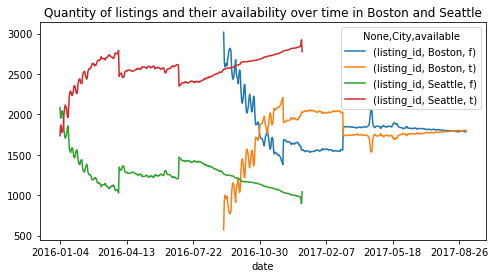

In [131]:
TD.plot(figsize=(8,4))
plt.title('Quantity of listings and their availability over time in Boston and Seattle')
plt.show()

The datasets have different periods and it can be seen that the availability of Seattle has increased over time. The same situation can be seen in Boston case getting steady arround a 50%. It coud be infered that the bussiest times in Seattle are april and june. On the other hand, the bussiest time in Boston is between june and august.

<br>2) Which city has the best Airbnb ratings?</br>

In [132]:
Ratings= X.copy()
Ratings['Final_Rate']=y

In [133]:
Ratings

,id,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_id,host_about,...,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan,Final_Rate
0,241032,0,1,1,1,0,0,0,956883,1,...,0,1,0,0,0,0,0,0,0,10.0
1,953595,1,1,1,1,1,1,1,5177328,1,...,0,0,1,0,0,1,0,1,0,10.0
2,3308979,1,1,1,1,1,1,1,16708587,1,...,0,0,1,0,0,0,0,0,0,10.0
3,278830,1,1,1,1,1,1,1,1452570,1,...,0,0,1,0,0,0,0,0,0,9.0
4,5956968,1,1,1,1,1,1,1,326758,1,...,0,0,1,0,0,0,0,0,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5921,14743129,1,0,1,1,1,0,1,91855319,0,...,0,1,0,0,0,0,0,0,0,8.0
5922,5280827,1,0,1,1,0,0,0,19246369,0,...,0,0,1,0,0,0,0,0,0,7.0
5923,14536322,1,1,1,1,1,0,1,78459716,1,...,0,0,1,0,0,0,0,0,0,10.0
5924,8373729,1,0,1,1,0,0,0,19246369,0,...,0,0,1,0,0,0,0,0,0,9.0


In [134]:
Ratings.columns

Index(['id', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'host_id', 'host_about',
       ...
       'instant_bookable_nan', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30',
       'cancellation_policy_nan', 'require_guest_profile_picture_t',
       'require_guest_profile_picture_nan',
       'require_guest_phone_verification_t',
       'require_guest_phone_verification_nan', 'Final_Rate'],
      dtype='object', length=451)

In [135]:
TD3=pd.pivot_table(Ratings,index=['market_Seattle'],values=['Final_Rate'],aggfunc='mean')
TD3

,Final_Rate
market_Seattle,
0,9.168234
1,9.452245


In [136]:
TD3['Ciudad']=['Boston','Seattle']

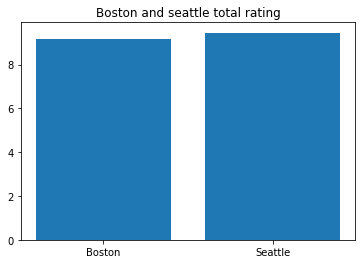

In [137]:
plt.bar(TD3.Ciudad,TD3.Final_Rate)
plt.title('Boston and seattle total rating')
plt.show()

It can be seen that the average rating among cities is very good and close among them. However Seattle ratings are slightly better than Boston

<br>3) What characteristics are related to higher ratings?</br>

In [138]:
# Get the coefficient of each variable
coefficients = model.coef_
variables=pd.DataFrame()
variables['Column']=X.columns
variables['Coefficient']=coefficients


# Sort the coefficients in descending order
variables.sort_values(by='Coefficient',inplace=True)

In [139]:
variables2=variables.head(10).append(variables.tail(10))

In [140]:
variables2

,Column,Coefficient
245,host_neighbourhood_Manhattan Beach,-7.592079e+14
309,host_identity_verified_nan,-6.853872e+14
337,room_type_nan,-4.893312e+14
351,extra_people_$150.00,-4.834554e+14
342,bed_type_nan,-4.205253e+14
355,extra_people_$18.00,-3.131766e+14
315,is_location_exact_nan,-3.025752e+14
15,amenities,-2.951719e+14
4,experiences_offered,-2.283054e+14
116,host_acceptance_rate_52%,-2.211388e+14


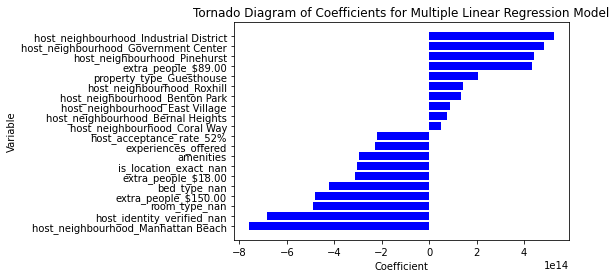

In [141]:
# Plot the tornado diagram
plt.figure()
plt.barh(variables2.Column, variables2.Coefficient, color='blue')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Tornado Diagram of Coefficients for Multiple Linear Regression Model')
plt.show()

Revisar si se puede alinear al nombre de la columna

In [99]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = Ratings.select_dtypes(include=['float64', 'int']).corr(method='pearson')
TCM=tidy_corr_matrix(corr_matrix)
TCM.head(10)

,variable_1,variable_2,r,abs_r
47,beds,bedrooms,0.735125,0.735125
33,bedrooms,beds,0.735125,0.735125
175,review_scores_communication,review_scores_checkin,0.686526,0.686526
161,review_scores_checkin,review_scores_communication,0.686526,0.686526
219,Final_Rate,review_scores_cleanliness,0.615214,0.615214
149,review_scores_cleanliness,Final_Rate,0.615214,0.615214
81,weekly_price,monthly_price,0.609599,0.609599
95,monthly_price,weekly_price,0.609599,0.609599
34,bedrooms,price,0.561413,0.561413
62,price,bedrooms,0.561413,0.561413


In [100]:
TCM_rating=TCM[TCM['variable_1']=='Final_Rate'].copy()

In [101]:
TCM_rating.sort_values(by='r',inplace=True)
TCM_rating

,variable_1,variable_2,r,abs_r
210,Final_Rate,host_listings_count,-0.196678,0.196678
216,Final_Rate,monthly_price,-0.072895,0.072895
218,Final_Rate,cleaning_fee,-0.071989,0.071989
214,Final_Rate,price,-0.039909,0.039909
215,Final_Rate,weekly_price,-0.031395,0.031395
213,Final_Rate,beds,-0.005984,0.005984
211,Final_Rate,bathrooms,0.007121,0.007121
217,Final_Rate,security_deposit,0.014702,0.014702
212,Final_Rate,bedrooms,0.015675,0.015675
223,Final_Rate,reviews_per_month,0.127279,0.127279


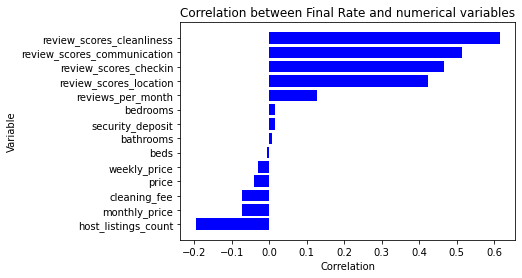

In [102]:
plt.figure()
plt.barh(TCM_rating.variable_2 ,TCM_rating.r, color='blue')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.title('Correlation between Final Rate and numerical variables')
plt.xticks(rotation=0)
plt.show()

model

<br>4) Which are the best rated hosts?</br>

In [103]:
TD4=pd.pivot_table(Ratings,index=['host_id'],values=['Final_Rate'],aggfunc='mean')
TD4.sort_values(by=['Final_Rate'], ascending=False,inplace= True)
TD4.head(300)

,Final_Rate
host_id,
92878185,10.0
10138187,10.0
34609479,10.0
34605512,10.0
10477638,10.0
...,...
6967157,10.0
6979871,10.0
6985440,10.0


In [104]:
TD5=TD4.Final_Rate.value_counts()

In [105]:
TD5

10.000000    2070
9.000000     1283
8.000000      227
9.500000      146
7.000000       43
             ... 
7.962264        1
9.388889        1
9.266667        1
7.882353        1
9.090909        1
Name: Final_Rate, Length: 65, dtype: int64

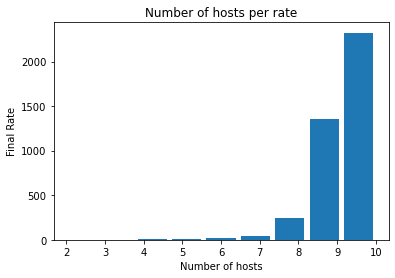

In [106]:
plt.figure()
plt.hist(x=TD4.Final_Rate, bins=9,rwidth=0.85)
plt.xlabel('Number of hosts')
plt.ylabel('Final Rate')
plt.title('Number of hosts per rate')
plt.show()

There are over 2070 hosts rated with 10 rating